In [413]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [414]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [415]:
df.shape

(30, 17)

In [416]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [417]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [418]:
# Fill missing values with mean
df.fillna(df.mean(), inplace=True)

In [419]:
null_counts = df.isnull().sum()
print(null_counts)

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


In [420]:
# Convert a single column to int
df['ERA'] = df['ERA'].astype('int64')

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W       30 non-null     int64
 1   R       30 non-null     int64
 2   AB      30 non-null     int64
 3   H       30 non-null     int64
 4   2B      30 non-null     int64
 5   3B      30 non-null     int64
 6   HR      30 non-null     int64
 7   BB      30 non-null     int64
 8   SO      30 non-null     int64
 9   SB      30 non-null     int64
 10  RA      30 non-null     int64
 11  ER      30 non-null     int64
 12  ERA     30 non-null     int64
 13  CG      30 non-null     int64
 14  SHO     30 non-null     int64
 15  SV      30 non-null     int64
 16  E       30 non-null     int64
dtypes: int64(17)
memory usage: 4.1 KB


In [422]:
# Elbow Method
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [423]:
# Separate features (X)
X = df  # Features

In [424]:

# calculating wcss for diff. clusters.
wcss=[]
for n in range(1,10):
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(X)
    print(f"Number of Clusters: {n}, WCSS: {kmeans.inertia_}")
    wcss.append(kmeans.inertia_)
   

Number of Clusters: 1, WCSS: 1107369.0999999999
Number of Clusters: 2, WCSS: 827626.3999999998
Number of Clusters: 3, WCSS: 651847.7101010102
Number of Clusters: 4, WCSS: 555231.4642857142
Number of Clusters: 5, WCSS: 483984.69642857136
Number of Clusters: 6, WCSS: 426335.8154761905
Number of Clusters: 7, WCSS: 392320.02499999997
Number of Clusters: 8, WCSS: 347585.8333333333
Number of Clusters: 9, WCSS: 277986.6388888889


In [425]:
wcss = np.array(wcss)

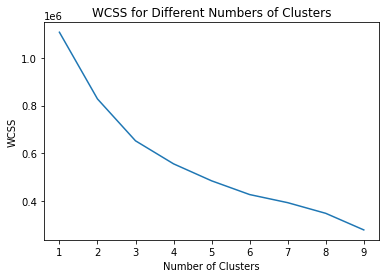

In [426]:
# Plotting wcss values.
plt.plot(range(1,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS for Different Numbers of Clusters')
plt.show()

In [427]:
#Convert wcss to numpy array
wcss = np.array(wcss)
wcss

array([1107369.1       ,  827626.4       ,  651847.71010101,
        555231.46428571,  483984.69642857,  426335.81547619,
        392320.025     ,  347585.83333333,  277986.63888889])

In [428]:
# Fitting K means to Dataset
kmeans=KMeans(n_clusters=7,random_state=42)
y_kmeans=kmeans.fit_predict(X)
print(y_kmeans)

[0 1 6 1 4 3 3 1 1 0 3 2 5 1 0 6 2 2 1 1 6 6 5 5 1 6 0 4 1 4]


In [429]:
# Model Evaluation
from sklearn.metrics import silhouette_score

In [430]:
silhouette_score(X,y_kmeans)

0.20824509231272112

In [431]:
X.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4,7,12,35,86


In [432]:
# Mini Batch Means
from sklearn.cluster import MiniBatchKMeans

In [433]:
# Create an instance of Mini-Batch K-Means
kmeans = MiniBatchKMeans(n_clusters=7)


In [434]:
# Fit the model to the data
kmeans.fit(X)

MiniBatchKMeans(n_clusters=7)

In [435]:
# Get the cluster labels for each data point
labels = kmeans.labels_

In [436]:
# Get the cluster centers
centroids = kmeans.cluster_centers_

In [437]:
# Print the cluster labels and centroids
print("Cluster Labels:")
print(labels)
print("\nCluster Centers:")
print(centroids)

Cluster Labels:
[3 4 1 4 0 5 3 4 4 3 3 6 1 4 3 2 2 6 4 4 2 6 1 1 4 6 3 0 4 0]

Cluster Centers:
[[7.37305389e+01 7.15389222e+02 5.60914970e+03 1.49597605e+03
  2.84059880e+02 4.86586826e+01 1.63550898e+02 4.44880240e+02
  1.28499401e+03 1.04335329e+02 7.85784431e+02 7.33760479e+02
  4.32934132e+00 3.96407186e+00 9.36526946e+00 3.84011976e+01
  8.89640719e+01]
 [7.50178571e+01 6.24285714e+02 5.43560268e+03 1.37908482e+03
  2.57611607e+02 2.71964286e+01 1.30415179e+02 4.52294643e+02
  1.13917857e+03 8.13169643e+01 6.92200893e+02 6.41026786e+02
  3.56250000e+00 3.87500000e+00 1.09464286e+01 4.05312500e+01
  8.44598214e+01]
 [9.57818182e+01 6.75478788e+02 5.54607879e+03 1.39830303e+03
  2.91642424e+02 2.75030303e+01 1.51963636e+02 4.84903030e+02
  1.29287273e+03 7.22060606e+01 5.78915152e+02 5.23400000e+02
  2.67272727e+00 6.78787879e-01 1.39939394e+01 5.52727273e+01
  1.01581818e+02]
 [8.38662791e+01 7.30968023e+02 5.57475000e+03 1.44612209e+03
  2.84578488e+02 3.49215116e+01 1.62915698e+

In [438]:
# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, labels)

In [439]:
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.19014052232279843


In [440]:
# Gettin Inertis Values
inertia = kmeans.inertia_

print("Inertia:", inertia)

Inertia: 378171.6057722453


In [441]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [442]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [443]:
# define parameters of DBSCAN
eps = 0.2  
min_samples = 7  # min. no samples


In [444]:
# Create  DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)


In [445]:
# Fit the model on dataset
dbscan.fit(X_scaled)


DBSCAN(eps=0.2, min_samples=7)

In [446]:
#getting cluster labe for each data point
labels = dbscan.labels_

In [447]:
print("Cluster Labels:")
print(labels)

Cluster Labels:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


In [448]:

import joblib
joblib.dump(KMeans, 'KMeans_model.pkl')

['KMeans_model.pkl']

In [449]:
#to load te save model 
loaded_model = joblib.load('kmeans_model.pkl')